In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import ast


import sys
import os
from pathlib import Path

In [2]:
lib_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'lib'))
print("Lib path:", lib_path)

# Append the absolute path to sys.path
sys.path.append(lib_path)

# Now, try importing onedmodel
from onedmodel import *

Lib path: /Users/guime/projects/SLTforSGD/code/lib


In [3]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

In [5]:
# Initialise
nSGD = 10**3
nsamples = 10**3
shuffle = True
batch_size= 20
w0 = 1.8
seed_init = 1
seed_data = 1
nw0 = 2
wmax = nw0 * w0
tmin = 3
frac_max = 10**-3
model = PolyModel(w0=w0, seed=seed_init, wmax=wmax, wmin=-wmax)
sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                           batch_size=batch_size, auto=True)
# Run parameter sweep
w0_range = np.arange(1, 2.2, 0.4)
batch_range = [20]
lr_range = [0.01]
df = sgd_runner.parameter_sweep(w0_range, batch_range, lr_range, 
                        model, tmin=tmin, frac_max=frac_max)

Running experiment 0 over 4


/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/guime/anaconda3/envs/devinterp/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [15]:
cleaned_df = df.copy().dropna()
for i, w0 in enumerate(w0_range):
    escape_rate = cleaned_df["escape_rate"].loc[cleaned_df["w0"]==w0].to_numpy()
    intercept = cleaned_df["intercept"].loc[cleaned_df["w0"]==w0].to_numpy()
    fraction = cleaned_df["fraction"].loc[cleaned_df["w0"]==w0].to_numpy()
    plt.subplot(3,2,i+1)
    for j in range(len(escape_rate)):
        log_frac = np.log(fraction[j])
        print(log_frac)
        time = np.arange(0,1, len(fraction[j]))
        y = escape_rate[j] * time + intercept[j]
        plt.plot(time, y)
        plt.plot(time, log_frac, '-')
        plt.xlabel("time")
        plt.ylabel("Log fraction")
plt.show()

[-2.86738224 -3.56052942 -4.57213033 -4.8598124  -5.26527751 -5.95842469
 -5.95842469        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf   

<ipython-input-15-7faf7255f6b3>:8: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction[j])


ValueError: x and y must have same first dimension, but have shapes (1,) and (201,)

<ipython-input-82-40d85c047319>:8: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction)


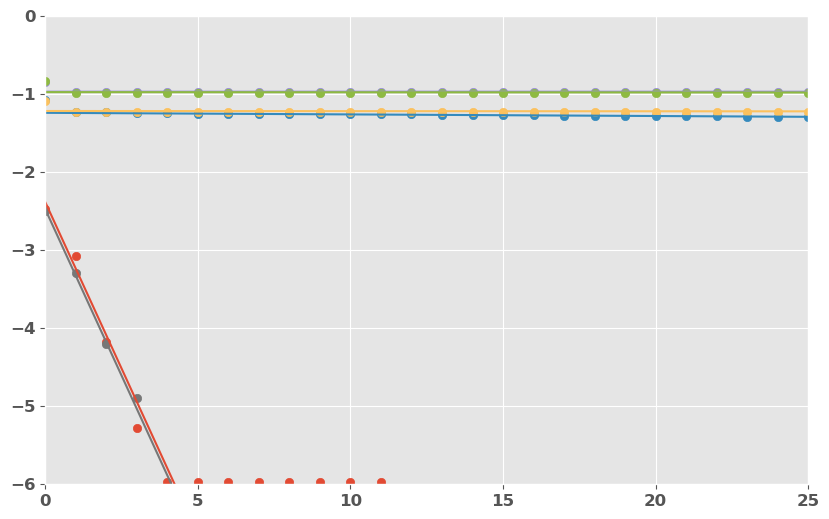

In [82]:
%matplotlib inline
cleaned_df = df.copy().dropna()
w0s = sorted(list(set(cleaned_df["w0"].to_list())))
w0 = w0s[0]
nB = len(cleaned_df["fraction"].loc[cleaned_df["w0"]==w0])
for i in range(nB):
    fraction = cleaned_df["fraction"].loc[cleaned_df["w0"]==w0].iloc[i]
    log_frac = np.log(fraction)
    slope = cleaned_df["escape_rate"].loc[cleaned_df["w0"]==w0].iloc[i]
    intercept = cleaned_df["intercept"].loc[cleaned_df["w0"]==w0].iloc[i]
    time = np.arange(0,len(fraction))
    y = slope * time + intercept
    plt.scatter(time, log_frac)
    plt.xlim(0,25)
    plt.ylim(-6,0)
    plt.plot(time, y)
plt.show()

In [48]:
w0s = cleaned_df["w0"].to_list()
print(w0s)
fraction = cleaned_df["fraction"].loc[cleaned_df["w0"]==w0]
print(fraction)

[1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5999999999999999, 1.5999999999999999, 1.5999999999999999, 1.5999999999999999, 1.7999999999999998, 1.7999999999999998, 1.7999999999999998, 1.7999999999999998, 1.7999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998]
Series([], Name: fraction, dtype: object)


In [57]:
slope = cleaned_df["escape_rate"]
print(slope)

0    -0.852374
1    -0.002049
2    -0.000019
3    -0.852374
4    -0.000180
5    -0.000187
7    -0.033707
8    -0.000020
10   -0.008732
11   -0.000209
12   -0.693147
13   -0.126667
14   -0.000021
16   -0.131200
17   -0.000205
19   -0.375314
20   -0.000021
22   -0.422149
23   -0.000201
Name: escape_rate, dtype: float64
